In [1]:
from blackbox import main
from sklearn import datasets
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math
from numpy import linalg
#from scipy import optimize
import pandas as pd
import matplotlib as mpl

In [2]:
# Main Variables
plotting_on = 1
mask_plotting = 1
cluster_size = 2
noise_threshold = 10.0
S = 1
sample_size = 49
cluster_size = 2

(49, 2)


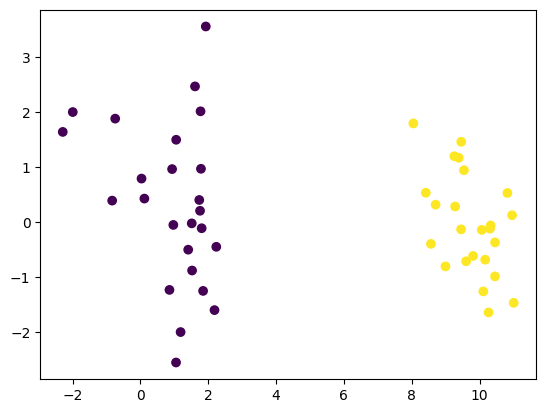

In [3]:
# Test 1 - prepare
# Create the data
data = datasets.make_blobs(n_samples=sample_size, cluster_std=[1.45,0.75], random_state=170, centers = [[1,0],[10,0]])
X = data[0]
y = data[1]
print(X.shape)
a = plt.scatter(X[:, 0], X[:, 1], c=y)

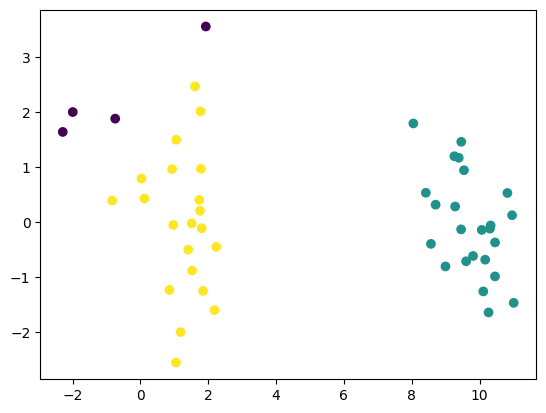

In [4]:
# Test 1 - Set
# Compute DBSCAN
# eplison is the radius of a particular point's neighbourhood circle which determines the cluster
# min-sample is minimum size of the cluster

epsilon = 1.32
min_sam = 5

db_model = DBSCAN(eps = epsilon, min_samples = min_sam)
db_pre = db_model.fit(X)
clusters = db_pre.labels_
plt.scatter(X[:, 0], X[:, 1], c=clusters)

Iteration:  1
Cluster 0
------------------------------node------------------------------
Lower bound:  [0.41984697557018597, 0.2920510809791197, 0.45168254380670236, 0.4133341733405117, 0.7315627713056935, 0.4133341733405117, 0.22745561818376253, 0.06149801905573037, 0.45168254380670236, 0.1335715874660431, 0.5934948582269922, 0.5934948582269922, 0.36314356449675295, 0.4277834819194683, 0.36041888400589805, 0.30083350399847353, 0.4277834819194683, 0.2732968313518253, 1.31449085244634, 0.06149801905573037, 0.1335715874660431, 0.36041888400589805, 0.24317983142486266, 0.22745561818376253]
Max is 1.31449085244634
Average is:  0.38653682264931133
Cluster 1
------------------------------node------------------------------
Lower bound:  [0.7551185676810335, 0.5470976648663668, 0.19790007932051742, 0.950417741448838, 0.4850938160465538, 0.5699160122509955, 0.5478606842536785, 0.19790007932051742, 0.4818453569617863, 0.395939426330903, 0.395939426330903, 0.5470976648663668, 0.4818453569617863, 

/Users/samchen/Desktop/samch/cs789/poisoning-dbscan/blackbox.py:189: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


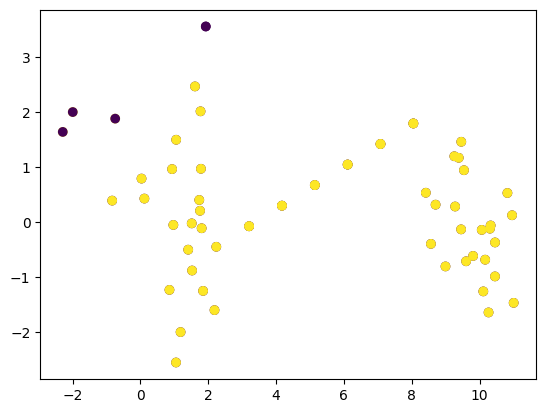

In [5]:
# Test 1 - Run
# Everything starts here
poisoned_X = main(X, clusters)

db_model = DBSCAN(eps = epsilon, min_samples = min_sam)
db_pre = db_model.fit(poisoned_X)
clusters = db_pre.labels_
plt.scatter(poisoned_X[:, 0], poisoned_X[:, 1], c=clusters)


(100, 2)
(100,)


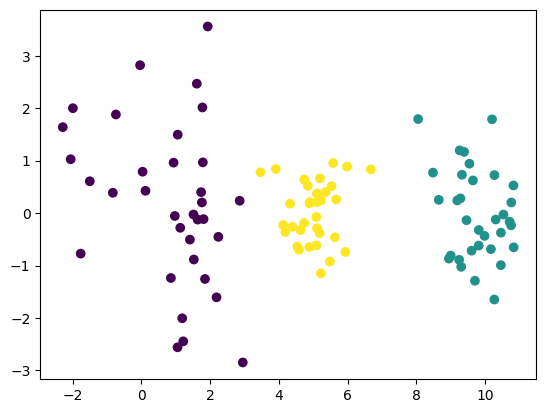

In [6]:
# Test 2 - Prepare
# Create the data
sample_size = 100
data = datasets.make_blobs(n_samples=sample_size, cluster_std=[1.45,0.75, 0.6], random_state=170, centers = [[1,0],[10,0], [5,0]])
X = data[0]
y = data[1]
print(X.shape)
print(y.shape)
a = plt.scatter(X[:, 0], X[:, 1], c=y)

(100,)


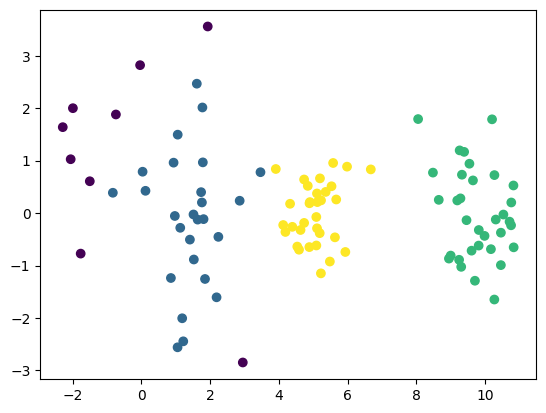

In [7]:
# Test 2 - Set
# Compute DBSCAN
# eplison is the radius of a particular point's neighbourhood circle which determines the cluster
# min-sample is minimum size of the cluster

epsilon = 1.2
min_sam = 5

db_model = DBSCAN(eps = epsilon, min_samples = min_sam)
db_pre = db_model.fit(X)
clusters = db_pre.labels_
print(clusters.shape)
plt.scatter(X[:, 0], X[:, 1], c=clusters)
num_clusters = len(set(clusters))-1 # Noisy samples are given the label -1.


In [10]:
print(type(X))

<class 'numpy.ndarray'>


Iteration:  1
Cluster 0
------------------------------node------------------------------
Lower bound:  [0.15601113725803664, 0.4850938160465538, 0.15601113725803664, 0.950417741448838, 0.4818453569617863, 0.5470976648663668, 0.20133711090469114, 0.19790007932051742, 0.8141182274488786, 0.2753013101665758, 0.7551185676810335, 0.4818453569617863, 0.5699160122509955, 0.44070507918698143, 0.3735247113827025, 0.20133711090469114, 0.395939426330903, 0.17155166719899886, 0.2753013101665758, 0.3735247113827025, 0.8141182274488786, 0.19790007932051742, 0.3598802404739016, 0.5470976648663668, 0.4850938160465538, 0.5478606842536785]
Max is 0.950417741448838
Average is:  0.4329172402899057
Cluster 1
------------------------------node------------------------------
Lower bound:  [0.0822767628340526, 0.24159511348127544, 0.0822767628340526, 0.22433019226212153, 0.14791123789162405, 0.4039699787273945, 0.3247920912614228, 0.33436739862852133, 0.2920510809791197, 0.10118704235323239, 0.1479112378916240

/Users/samchen/Desktop/samch/cs789/poisoning-dbscan/blackbox.py:189: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/Users/samchen/Desktop/samch/cs789/poisoning-dbscan/blackbox.py:189: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]
/Users/samchen/Desktop/samch/cs789/poisoning-dbscan/blackbox.py:189: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future d

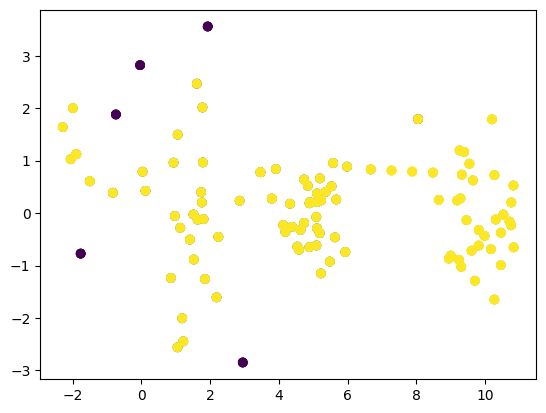

In [9]:
# Test 2 - Run
# Everything starts here
poisoned_X = main(X, clusters)

db_model = DBSCAN(eps = epsilon, min_samples = min_sam)
db_pre = db_model.fit(poisoned_X)
clusters = db_pre.labels_
plt.scatter(poisoned_X[:, 0], poisoned_X[:, 1], c=clusters)